# Prédire si un patient a une maladie cardiaque ou non

Ce projet vise à utiliser plusieurs packages de Machine Learning et de Data Science appartenant à Python. Il a pour but d'essayer de prédire si un patient a un dysfonctionnement cardiaque en fonction de son dossier médical.

Nous allons procéder de la manière suivante:

1. Définition du problème
2. Data
3. Evaluation
4. Caractéristiques
5. Modélisation
6. Expérimentation

## 1. Définition du problème
> Avec le dossier médiacal d'un patient, pouvons nous prédire s'il a un dysfonctionnement cardiaque ou non ?

## 2. Data
Les données viennet du site "UCI Machine Learning Repository" de Cleavland data. https://archive.ics.uci.edu/dataset/45/heart+disease

On peut aussi retrouver la base de données sur Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# 3. Evalutation
> Si le modèle arrive à 95% de précision alors celui-ci pourra être considéré comme prêt à être déployé.

# 4. Caractéristiques 

**Dictionnaire (en anglais):**
* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
    * Value 0: asymptomatic
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: resting electrocardiographic results
    * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    * Value 1: normal
    * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
* ca: The number of major vessels (0–3)
* thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
    * Value 1: fixed defect (no blood flow in some part of the heart)
    * Value 2: normal blood flow
    * Value 3: reversible defect (a blood flow is observed but it is not normal)
* target: Heart disease (1 = no, 0= yes)

## Préparation des librairies
Les outils utilisés sont pandas, Matplotlib et Numpy pour l'analyse et la manipulation de données. Pour le Machine learning Scikit-learn sera la librarie utilisée.

In [3]:
# Importation de tous les outils 
# Outils pour l'analyse des données exploratoire et les représentations graphiques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des modèles à partir de Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Métriques afin d'évaluer le modèle
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

## Importation de la base

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploration de la data (Analyse exploratoire des données ou EDA)

L'objectif est de découvrir des choses sur la base de données afin d'en devenir un expert.

1. Quelle(s) questions essayons-nous de résoudre ?
2. Quel différents types de données avons-nous et comment traitons-nous les différents types ?
3. Que manque-t-il dans la data et commnet palions-nous à cela ?
4. Où sont les données extrêmes et pourquoi devrions-nous y porter notre attention ?
5. Comment pouvons-nous ajouter, changer, ou enlever des caractéristiques afin d'en tirer plus de notre base de données ?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Combien de classes existe-t-il ?
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

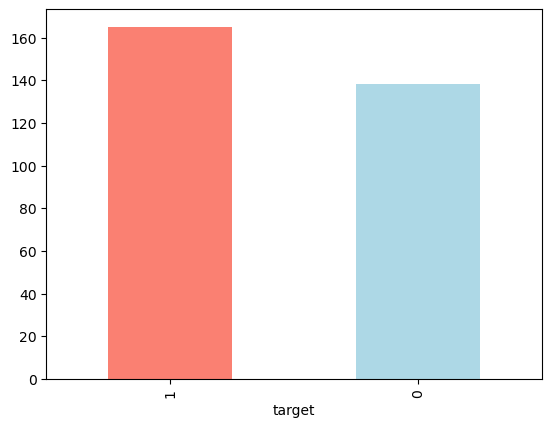

In [8]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Manque-t-il des données ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Nombre de cas par sexe 

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# Comparaison de maladie avec le sexe
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
round(93/207*100, 2), round(72/96*100, 2), round((72+92)/(207+96)*100, 2)

(44.93, 75.0, 54.13)

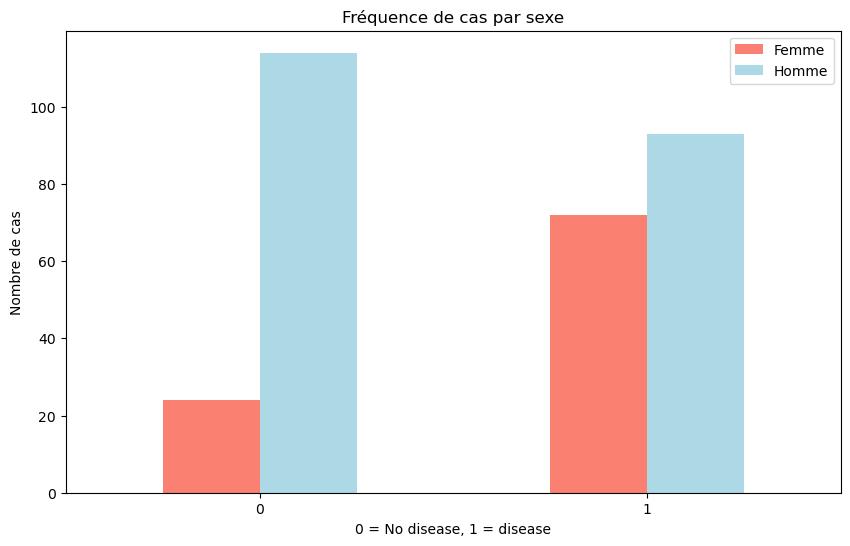

In [15]:
# Représenation graphique
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                   figsize = (10, 6),
                                   color = ['salmon', 'lightblue']);

plt.title('Fréquence de cas par sexe')
plt.xlabel('0 = No disease, 1 = disease')
plt.ylabel('Nombre de cas')
plt.legend(['Femme', 'Homme'])
plt.xticks(rotation = 0);

## Nombre de cas par âge

In [16]:
positif = df[df['target'] == 1]
positif

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


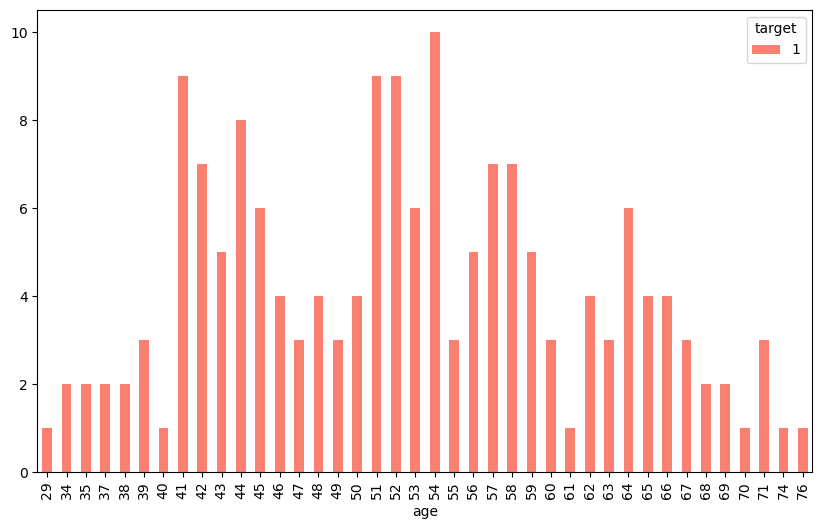

In [17]:
pd.crosstab(positif.age, positif.target).plot(kind = 'bar',
                                             figsize = (10, 6),
                                             color = ['salmon']);

## Influence de âge et fréquence maximale sur apparition du dysfonctionnement cardiaque

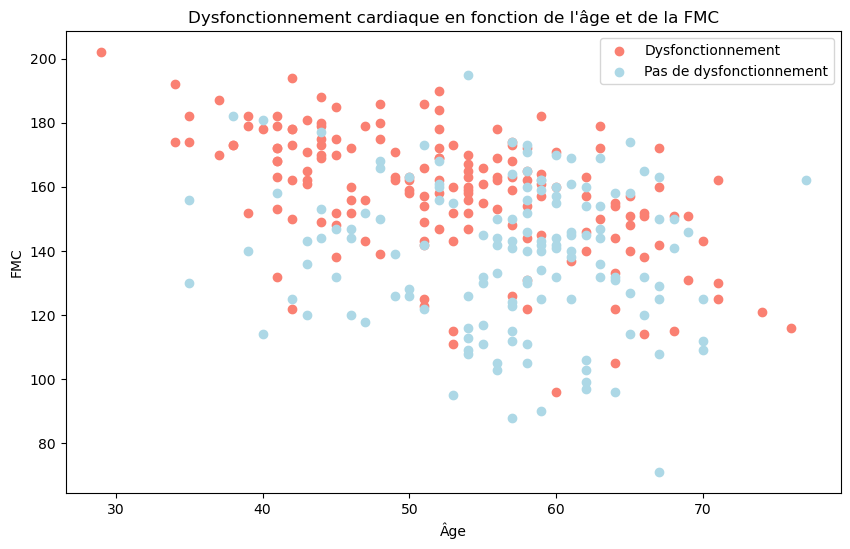

In [18]:
plt.figure(figsize = (10, 6))

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color = 'salmon')

plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color = 'lightblue')

plt.title("Dysfonctionnement cardiaque en fonction de l'âge et de la FMC")
plt.xlabel('Âge')
plt.ylabel('FMC')
plt.legend(['Dysfonctionnement', 'Pas de dysfonctionnement']);

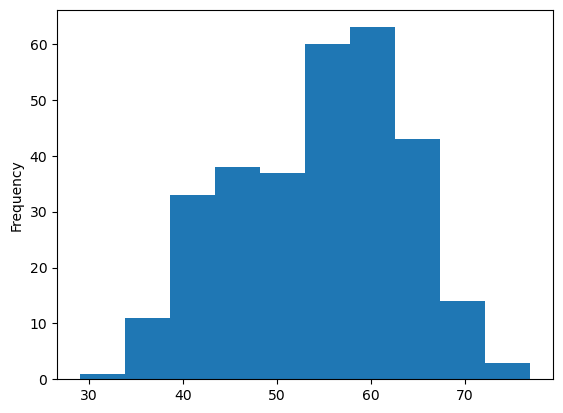

In [59]:
# Distribution de l'âge
df.age.plot.hist();

## Dysfonctionnement en fonction des douleurs au niveau de la cage thoracique 

* cp: chest pain type
    * Value 0: asymptomatic
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: typical angina

In [60]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


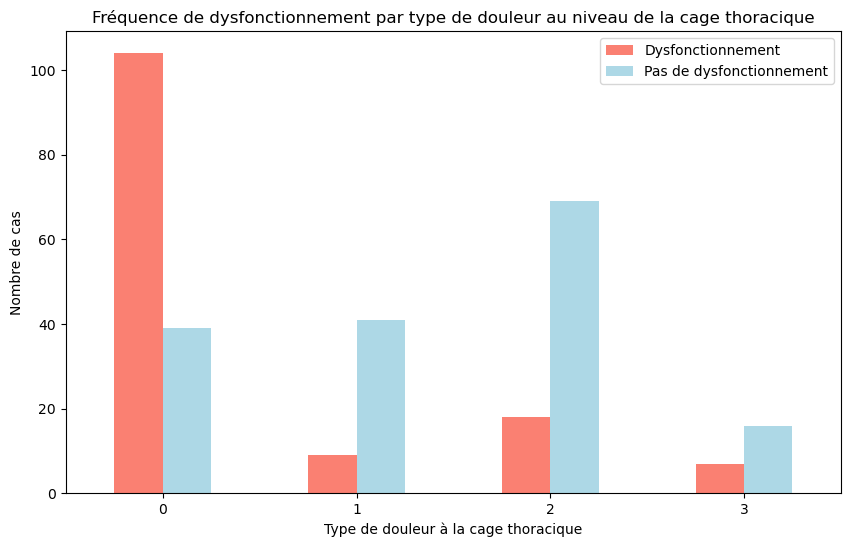

In [63]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                  figsize = (10, 6),
                                  color = ['salmon', 'lightblue'])

plt.title('Fréquence de dysfonctionnement par type de douleur au niveau de la cage thoracique')
plt.xlabel('Type de douleur à la cage thoracique')
plt.ylabel('Nombre de cas')
plt.legend(['Dysfonctionnement', 'Pas de dysfonctionnement'])
plt.xticks(rotation = 0);

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


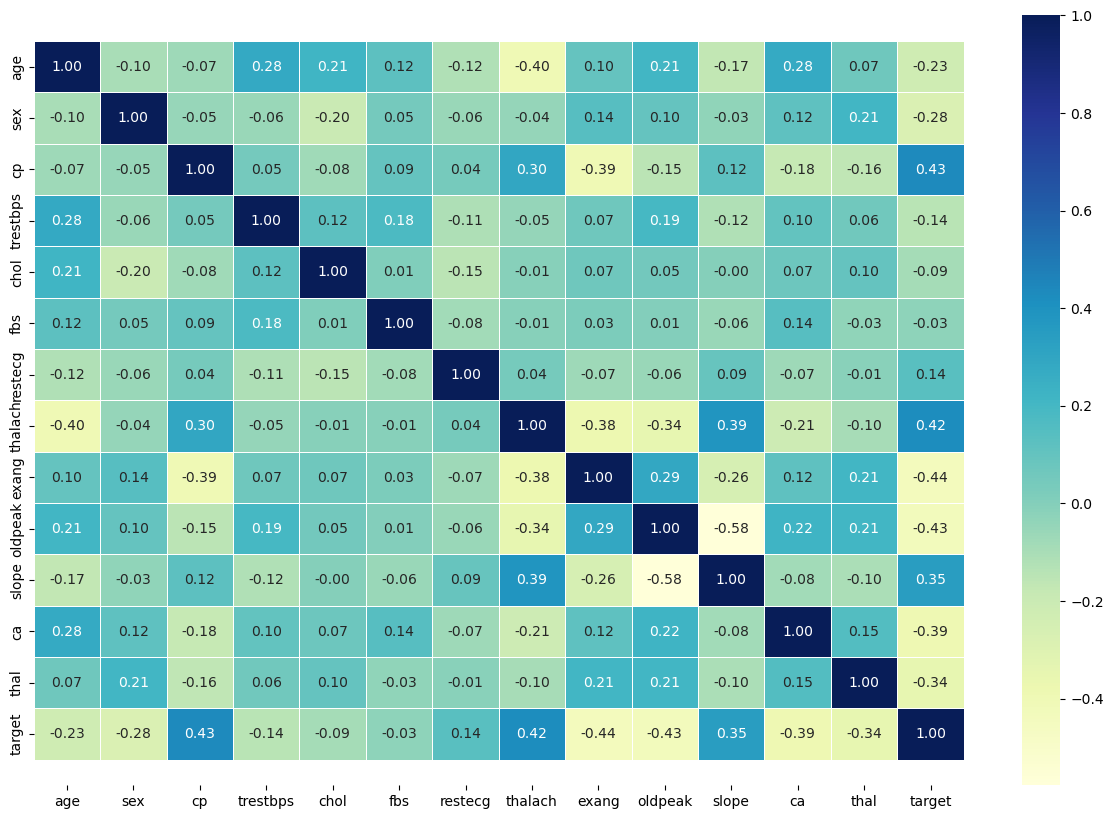

In [70]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap  = 'YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## 5. Modélisation

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
# Division de la data en deux échantillons (X et y)
X = df.drop(['target'], axis = 1)
y = df['target']

In [73]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [74]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [75]:
# Division de la data en deux échantillons (test et train)
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [76]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [77]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Maintenant que nous avons nos échantillons de test et d'entraînement, il est temps d'utilisé un modèle de Machine Learning

Nous allons l'entraîner puis le tester.

Nous allons essayer 3 modèles:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [80]:
# Mettre les modèles dans un dictionnaire
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Fonction pour fit et évaluer nos modèles
def fit_et_eval(models, X_train, X_test, y_train, y_test):
    """
    Fit et évaluer les modèles de Machine Learning
    Modèles: Dictionnaire de modèles Scikit-Learn
    """
    # Random seed
    np.random.seed(42)
    #Dictionnaire
    model_scores = {}
    # Loop les modèles
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [82]:
eval_model = fit_et_eval(models, X_train, X_test, y_train, y_test)
eval_model

C:\Users\frdi\OneDrive\Bureau\projet\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Comparaison des modèles

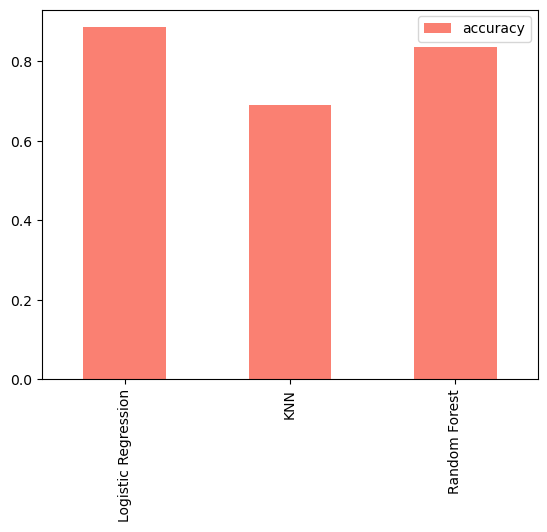

In [84]:
model_compare = pd.DataFrame(eval_model, index = ['accuracy'])
model_compare.T.plot.bar(color = ['salmon']);

Maintenant nous avons nos modèles de base, mais ceci n'est pas assez robuste.

Voici ne que nous allons faire ensuite: 

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

Les deux premiers points sont pour tous les types de modèles. Les autres sont spécifiques aux modèles de classification.

### Hyperparameter tunning

In [87]:
# Tuning de KNN
train_scores = []
test_scores = []

# Création d'une liste de différentes valeurs pour n_neighbors
neighbors = range(1, 21)

# Instance de KNN
knn = KNeighborsClassifier()

# Loop de différents n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # Fit l'algo
    knn.fit(X_train, y_train)
    # Mise à jour de la liste des scores train
    train_scores.append(knn.score(X_train, y_train))
    # Mise à jour de la liste des scores test
    test_scores.append(knn.score(X_test, y_test))

In [89]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [90]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Le score Maximal de KNN sur la data de test : 75.41%


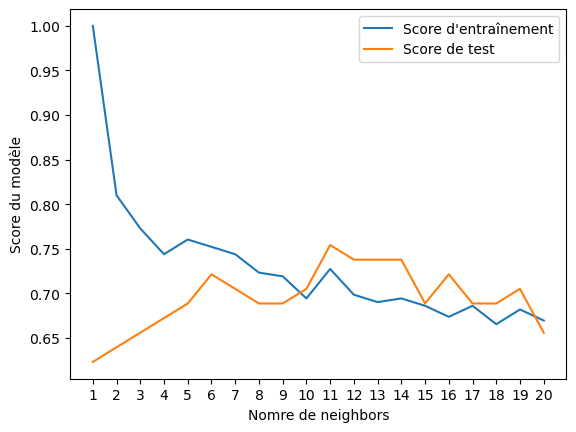

In [93]:
plt.plot(neighbors, train_scores, label = "Score d'entraînement")
plt.plot(neighbors, test_scores, label = "Score de test")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Nomre de neighbors')
plt.ylabel('Score du modèle')
plt.legend()

print(f'Le score Maximal de KNN sur la data de test : {max(test_scores)*100:.2f}%');

## Hyperparameter tunning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV 

In [100]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C' : np.logspace(-4, 4, 20),
               'solver' : ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

Maintenant que nous avons nos grilles, il faut tune les modèles avec RandomizedSearchCV

In [97]:
# Tune LogisticRegression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [98]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [101]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [103]:
 rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [104]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [107]:
eval_model

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparametrs Tunning with GridSearchCV
LogisticRegression était le meilleur donc on va le tuner

In [108]:
log_reg_grid = {'C' : np.logspace(-4, 4, 30),
               'solver' : ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [110]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [111]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* Roc curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisoin and evaluate our trained model, first we need to make predicitons.

In [112]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [113]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [114]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

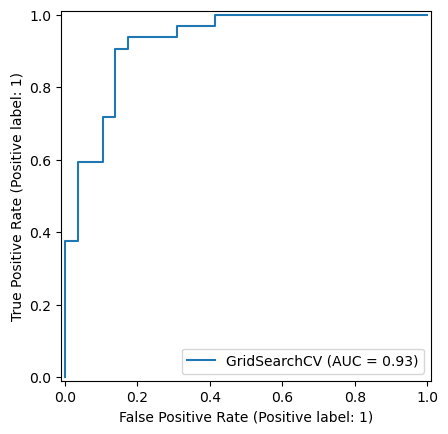

In [121]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [122]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

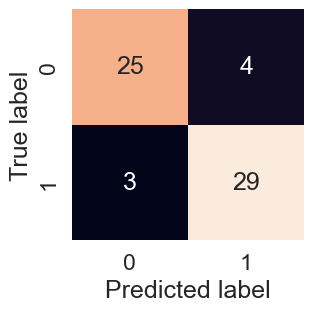

In [123]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Now that we've got ROC curve, AUC metric and confusion matrix, let's get a cclassification report as well as cross-validation precision, recall and f1-score.

In [124]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [126]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [127]:
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

In [138]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf, 
                             X, 
                             y, 
                             cv = 5, 
                             scoring = 'accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [139]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [140]:
# Cross-validation precision
cv_prec = cross_val_score(clf, 
                             X, 
                             y, 
                             cv = 5, 
                             scoring = 'precision')

cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [141]:
# Cross-validation recall
cv_recall = cross_val_score(clf, 
                             X, 
                             y, 
                             cv = 5, 
                             scoring = 'recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [142]:
# Cross-validation f1-score
cv_f1 = cross_val_score(clf, 
                             X, 
                             y, 
                             cv = 5, 
                             scoring = 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

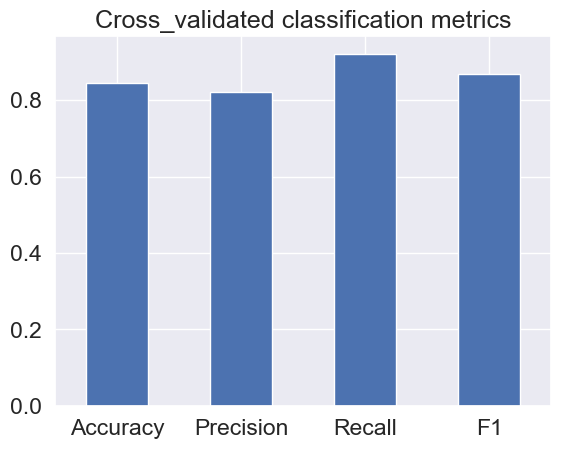

In [144]:
# Visualize cross-validation metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_prec,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title = 'Cross_validated classification metrics',
                     legend = False)
plt.xticks(rotation = 0);

### Feature importance

Feature importance in another way of askin, "Which features contributed most to the outcomes of the model and how did they contribute ?"

Finding feature importance is different for each machine learning model. One way to find feature import is to seach for "(Model name) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [145]:
clf.fit(X_train, y_train);

In [146]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [147]:
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [149]:
# Match coef(s of features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

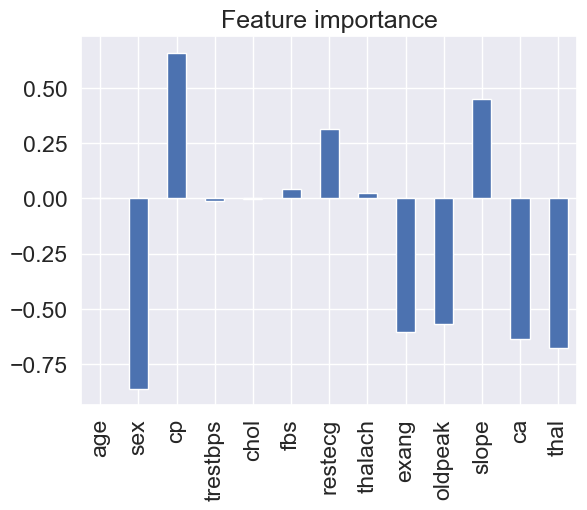

In [151]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index = [0])
features_df.T.plot.bar(title = 'Feature importance', legend = False);